House price

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/softwareWCU/Machine-Learning-Regression-Models-using-House-Price-Dataset/main/Housing%20Price.csv'
df = pd.read_csv(url)
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


The Data Types and Missing Values

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


check correlations between numerical columns in df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


For better visualization, let's display the correlation matrix as a heatmap:

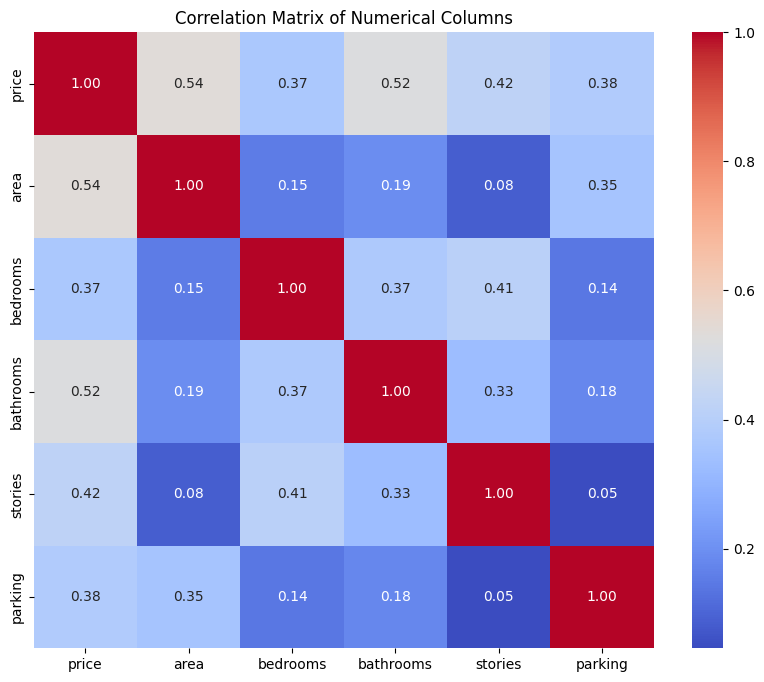

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# Task
Build and evaluate a Linear Regression model for house price prediction. The process includes one-hot encoding categorical features in the `df` DataFrame, splitting the data into training and testing sets, training the model, evaluating its performance using MAE, MSE, and R-squared, visualizing actual vs. predicted prices, and summarizing the results.

## One-Hot Encode Categorical Features

### Subtask:
Convert the categorical features in the DataFrame `df` into numerical format using one-hot encoding to make them suitable for the regression model.


**Reasoning**:
Identify categorical columns by checking their data types from `df.info()` output, then apply one-hot encoding to these columns using `pd.get_dummies()` to convert them into numerical format.



In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("DataFrame after one-hot encoding:")
print(df_encoded.head())
print("\nInfo of DataFrame after one-hot encoding:")
print(df_encoded.info())

DataFrame after one-hot encoding:
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstat

## Prepare Data for Modeling

### Subtask:
Define the features (X) and the target variable (y, which is 'price'). Then, split the preprocessed data into training and testing sets to prepare for model training and evaluation.


**Reasoning**:
First, I will define the feature matrix (X) by dropping the 'price' column from `df_encoded` and define the target vector (y) as the 'price' column. Then, I will split the data into training and testing sets using `train_test_split` to prepare for model training and evaluation.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (436, 13)
Shape of X_test: (109, 13)
Shape of y_train: (436,)
Shape of y_test: (109,)


In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/softwareWCU/Machine-Learning-Regression-Models-using-House-Price-Dataset/main/Housing%20Price.csv'
df = pd.read_csv(url)
df.head(14)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


Tail

In [3]:
df.tail(14)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
531,2233000,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,2135000,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
533,2100000,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
534,2100000,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [9]:
from numpy import select
categorical_cols = df.select_dtypes(include='object').columns
select_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
print(select_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [16]:
from sklearn.preprocessing import LabelEncoder

for cols in categorical_cols:
  if cols in select_cols:
    le = LabelEncoder()
    df[cols] = le.fit_transform(df[cols])

Relationship or Association

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

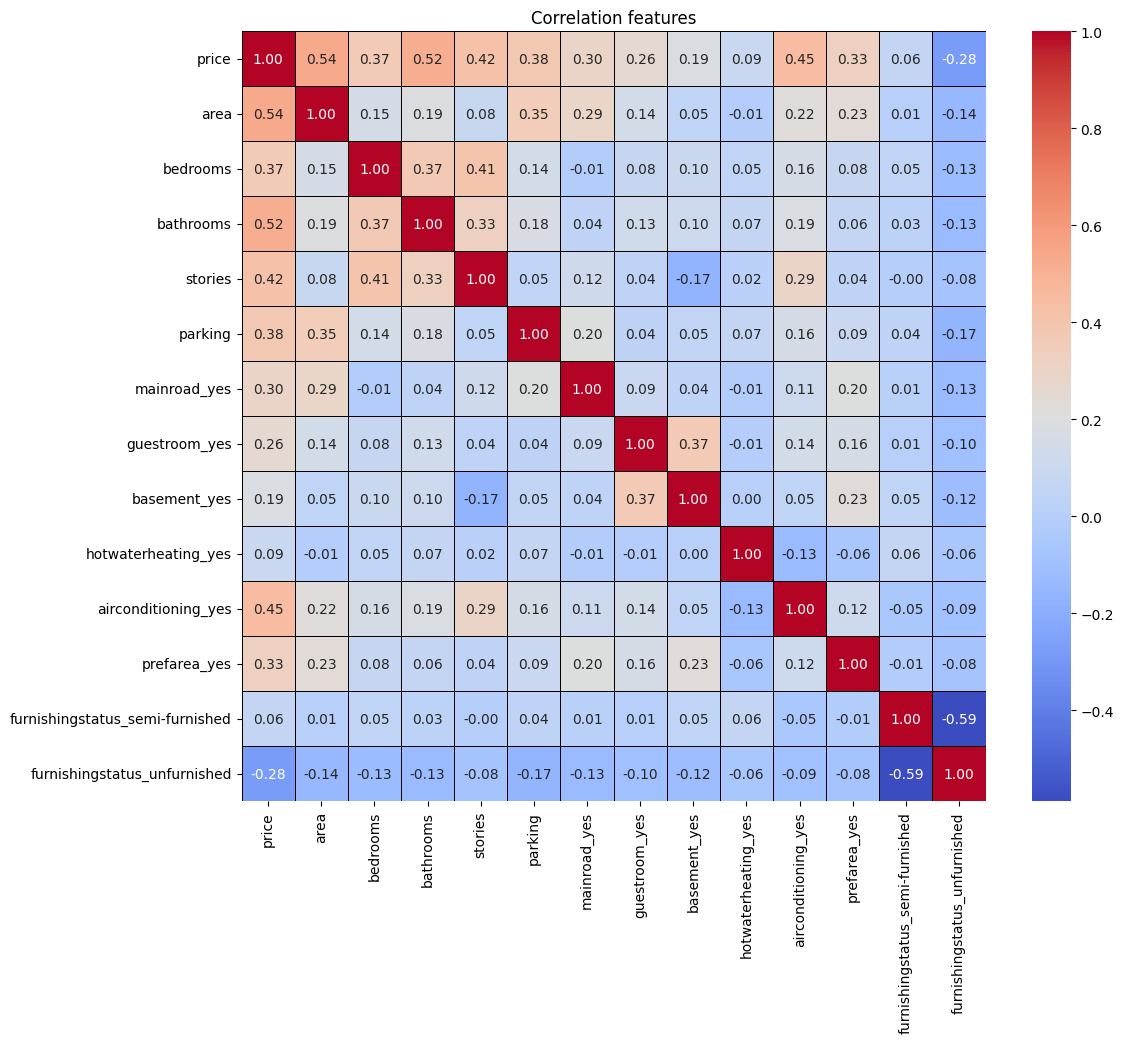

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload df to ensure original state for one-hot encoding
url = 'https://raw.githubusercontent.com/softwareWCU/Machine-Learning-Regression-Models-using-House-Price-Dataset/main/Housing%20Price.csv'
df = pd.read_csv(url)

# Re-apply one-hot encoding logic to get df_encoded
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

plt.figure(figsize=(12, 10))
sns.heatmap(data=df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5 , linecolor='black')
plt.title('Correlation features')
plt.show()

Interpretation

from the correlation matrix area and bathrooms  have strong relationship with price

## Train a Linear Regression Model

### Subtask:
Initialize and train a Linear Regression model using the training data.


**Reasoning**:
I need to import the LinearRegression class, instantiate it, and then train the model using the provided training data (X_train and y_train).



In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Evaluate Model Performance

### Subtask:
Use the trained model to make predictions on the test set and evaluate its performance using common regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared. Also, plot the actual vs. predicted prices.


**Reasoning**:
I will make predictions on the test set, calculate various regression evaluation metrics (MAE, MSE, R-squared), and then visualize the actual vs. predicted prices using a scatter plot to assess the model's performance.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line for perfect prediction
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Provide a summary of the model's performance based on the evaluation metrics.


## Summary:

### Q&A
The Linear Regression model for house price prediction achieved an R-squared value of 0.65, meaning it explains approximately 65% of the variance in house prices on the test set.

### Data Analysis Key Findings
*   Categorical features were successfully one-hot encoded, transforming columns like `mainroad` and `furnishingstatus` into numerical representations (e.g., `mainroad_yes`, `furnishingstatus_semi-furnished`), making the dataset entirely numerical.
*   The preprocessed data was split into training and testing sets, with 436 samples used for training and 109 samples reserved for testing the model's performance.
*   A Linear Regression model was successfully trained on the prepared training data.
*   The model's performance on the test set was evaluated with the following metrics:
    *   Mean Absolute Error (MAE): \$970,043.40
    *   Mean Squared Error (MSE): \$1,754,318,687,330.66
    *   R-squared (R2): 0.65, indicating that the model explains approximately 65% of the variance in house prices.

### Insights or Next Steps
*   The model demonstrates a moderate ability to predict house prices, explaining 65% of the variance. This suggests that while it captures a significant portion of the underlying relationships, there's still room for improvement.
*   Future work could involve exploring additional features (e.g., location data, proximity to amenities), applying feature engineering techniques, or experimenting with more advanced regression models (e.g., RandomForestRegressor, GradientBoostingRegressor) to potentially improve predictive accuracy and R-squared.
